<a href="https://www.kaggle.com/code/ayushs9020/benefits-of-the-data?scriptVersionId=139695409" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFC67D; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFC67D">Meta Kaggle Code | Benefits</p>

<div style="border-radius:10px; border:#FFC67D solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
$Kaggle$ recently released their `successor` to **[Meta Kaggle](https://www.kaggle.com/datasets/kaggle/meta-kaggle)**. This `dataset` `contains` the `notebook contents` of `possibly` `all` the `notebooks` on $Kaggle$, which `costs` a `lot` while `scraping`/`specially processing` it to make it an `accessible dataset` to the $Kagglers$. 

**First thanks to the [Kaggle Team](https://www.kaggle.com/kaggleteam) to make this quality data available to everyone** 

At `first` when I saw the data. I didnt really `understood` the `benefits of the data`, like `how it will be benefical ? `/`what are the use cases ?`, after some time, I found some. One of the reason that the `data is beneficial` is the `helping`/`supporting`/`teaching` `nature` of the $Kaggle$ $Community$ as a whole. This nature `allows simple explanations` to `complex code` `sturctures`/`classes`/`functions`/`pipelines`. This can help `making chatbots` which `might answer code` when `given a prompt`. **Again this is just my assumption/kind of goal for the data**
    
Further versions of the notebooks will contain some preprocessing of the major projects I am thinking of 

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#32CD32; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #32CD32">1 | Data Preprocessing</p>

In [1]:
import tqdm
import os 
import json
import glob

<div style="border-radius:10px; border:#32CD32 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

First we will iterate through all the sample files and make a list which will contain all the file names. We will limit our scope till first $1,000$ files

In [2]:
folder_list = (glob.glob('/kaggle/input/meta-kaggle-code/**/**'))
# folder_list.reverse()
folder_list = folder_list[:1000]

In [3]:
file_list = []

for file in tqdm.tqdm(folder_list , total = len(folder_list)):
    x_file = os.listdir(file)
    for file_n in x_file:
        
        file_list.append(str(file) + '/' + str(file_n))

100%|██████████| 1000/1000 [00:09<00:00, 103.95it/s]


In [4]:
file_list = sorted(file_list)

<div style="border-radius:10px; border:#32CD32 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now we will make $3$ Seperate lists that will store the respective files

In [5]:
ipynb_list = []
r_list = []
py_list = []

In [6]:
for file in tqdm.tqdm(file_list , total = len(file_list) , desc = 'Seperating Files --->'):
    if file.split('.')[1] == 'ipynb':ipynb_list.append(file)
    elif file.split('.')[1] == 'r': r_list.append(file)
    else : py_list.append(file)

Seperating Files --->: 100%|██████████| 23273/23273 [00:00<00:00, 1262239.60it/s]


<div style="border-radius:10px; border:#32CD32 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now we will make a function that will segregate files in the `ipynb` files 

In [7]:
def display_file(file_path):
    '''
    Displays the file in a str format
    
    Arg : file_path - path to the file 
    Returns - Dictionary with file info
    '''
    def extract_libraries(value , return_type = 'libraries'):
        '''                                                             
        Extract Libraies/Sub Libraries from a string value                             
                                                                         
        Arg : value - Str to be extracted from                           
        Return - Set of Unique Libraries                                 
        '''

        libraries = [
            line.split()[1].split('.')[0]
            for line in lines
            if line.startswith('import') or line.startswith('from')]
        
        sub_libraries = [
            line.split()[3].split('.')[0]
            for line in lines 
            if line.startswith('from')]
        
        if return_type == 'libraries' : return set(libraries)

        return set(su_libraries)

    if file.split('.')[-1] == 'r':pass
    if file.split('.')[-1] == 'py':pass
    if file.split('.')[-1] == 'ipynb' :
        with open(file_path , 'r') as file:
            content = file.read()
            content = json.loads(content)

            cells = content['cells']

            codes = [
                cell['source']
                for cell in cells 
                if cell['cell_type'] == 'code']
            markdown = [
                cell['source']
                for cell in cells
                if cell['cell_type'] == 'markdown']
            libraries = [
                extract_libraries(code , return_type = 'libraries') 
                for code in codes]
            sub_libraries = [
                extract_libraries(code , return_type = 'sub')
                for code in codes]
        
            libraries = set([
                library 
                for library in [
                    val
                    for val in libraries]])
            sub_libraries = set([
                sub_library 
                for sublibrary in [
                    val 
                    for val in sub_libraries]])

            
            for cell in cells:
                if cell['cell_type'] == 'code':
                    if 'execution' in cell['metadata'].keys():
                        year = list(cell['metadata']['execution'].values())[0].split('-')[0]
                        break

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00B9F7; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00B9F7">2 | Data Visualization</p>

In [8]:
import matplotlib.pyplot as plt 

<div style="border-radius:10px; border:#00B9F7 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Lets see how much files we have of each section

Text(0.5, 1.0, 'File Number Distribution')

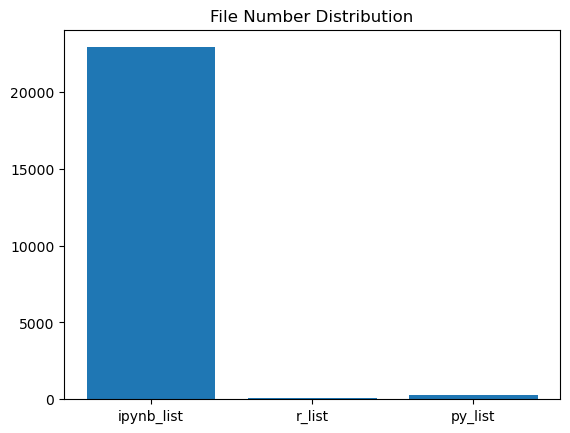

In [9]:
plt.bar(
    ['ipynb_list' , 'r_list' , 'py_list'] , 
    [len(ipynb_list) , len(r_list) , len(py_list)]
)

plt.title('File Number Distribution')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFA500; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFA500">3 | Ending 🏁</p>

<div style="border-radius:10px; border:#FFA500 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

**WE WILL GO DEEPER INTO THE DATA IN THE UPCOMING VERSIONS**

**PLEASE COMMENT DOWN IF I DID ANY MISTAKES, OR IF CAN MAKE THIS MORE CONNECTED TO THE GROUND, OR SUGGESTIONS. YOUR ASSISTS ARE HIGHLY APPRECIABLE**

**THATS IT FOR TODAY GUYS**

**HOPE YOU UNDERSTOOD AND LIKED MY WORK**

**DONT FORGET TO MAKE AN UPVOTE $:)$**
    
<img src = "https://i.imgflip.com/19aadg.jpg">
   
**PEACE OUT**